# Evaluation Portfolio (Task - 3)

## Demonstrating Data Analytics Pipeline (collection, cleaning, transformation and visualisation)
### Submited By - Khwnasat Giri Narzary

### Step 1 - Data Collection/Loading

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading data from local storage
original = pd.read_csv("job_placement_data.csv")
original.sample(5)

,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience,skills
41,42,Mia Gonzalez,Female,26.0,Bachelor's,Electronics and Communication,University of Delaware,Placed,65000,3.7,1.0,"Python, SQL, Data Analysis"
525,526,Oliver Rodriguez,Male,NaN,Bachelor's,Computer Science,University of North Carolina--Chapel Hill,Not Placed,0,3.6,1.0,"Python, SQL, Data Analysis"
393,394,Jack Garcia,Male,26.0,Bachelor's,Information Technology,University of Pennsylvania,Not Placed,0,3.7,2.0,"Machine Learning, AI, Deep Learning"
488,489,Ava Lee,Female,24.0,Bachelor's,Information Technology,University of Michigan--Ann Arbor,Placed,67000,3.9,3.0,"Networking, Cyber Security, Linux"
84,85,Jack Bailey,Male,26.0,Bachelor's,Electrical Engineering,University of Virginia,Placed,64000,3.9,2.0,"Python, SQL, Data Analysis"


#### Checking Data for inconsistency or issues

In [3]:
# Making an independent copy of our dataset
data = original.copy()

# Checking shape of data (rows,columns)
data.shape

(700, 12)

In [4]:
# Checking datatypes 
data.dtypes.reset_index()

,index,0
0,id,int64
1,name,object
2,gender,object
3,age,float64
4,degree,object
5,stream,object
6,college_name,object
7,placement_status,object
8,salary,int64
9,gpa,float64


In [5]:
# Checking for Null/Missing Values
data.isnull().sum()

id                      0
name                    0
gender                  0
age                    70
degree                  0
stream                  0
college_name            0
placement_status        0
salary                  0
gpa                     0
years_of_experience     1
skills                  0
dtype: int64

#### Found missing value in "years_of_experience" and "Age"

In [6]:
# Total Columns in dataset
data.columns


Index(['id', 'name', 'gender', 'age', 'degree', 'stream', 'college_name',
       'placement_status', 'salary', 'gpa', 'years_of_experience', 'skills'],
      dtype='object')

In [10]:
# Displaying unique values in each necessary columns

columns = ['gender', 'age', 'degree', 'stream', 'college_name','placement_status','years_of_experience']
print("==================== S T A R T =======================")

for i in columns:
    print(data[i].value_counts())
    print("======================================================")

==================== S T A R T =======================
gender
Female    366
Male      334
Name: count, dtype: int64
age
24.0    187
23.0    180
26.0    169
25.0     94
Name: count, dtype: int64
degree
Bachelor's    700
Name: count, dtype: int64
stream
Computer Science                 214
Information Technology           152
Electrical Engineering           112
Mechanical Engineering           111
Electronics and Communication    111
Name: count, dtype: int64
college_name
University of Michigan--Ann Arbor            43
University of California--Berkeley           43
University of Colorado--Boulder              43
University of Illinois--Urbana-Champaign     43
University of Virginia                       43
University of North Carolina--Chapel Hill    42
University of Maryland--College Park         42
University of California--Santa Cruz         42
University of Pennsylvania                   40
University of Washington                     40
University of California--Riverside         

In [11]:
# checking for duplicate values
data.duplicated().sum()

0

### Findings/suggestions for next step: 
1. Found missing values in (Age:70, years_of_experience:1)
2. Datatypes can be changed 
3. Columns can be renamed
4. Unnecessary columns can be removed (id,degree)
5. Values can be encoded (status, stream)

### Step 2 & 3 - Data Cleaning and Transformation

In [12]:
# Renaming columns for easier use 
data.rename(columns={"years_of_experience":"experience"}, inplace=True)
data.rename(columns={"college_name":"college"}, inplace=True)
data.rename(columns={"placement_status":"status"},inplace=True)
data.columns

Index(['id', 'name', 'gender', 'age', 'degree', 'stream', 'college', 'status',
       'salary', 'gpa', 'experience', 'skills'],
      dtype='object')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          700 non-null    int64  
 1   name        700 non-null    object 
 2   gender      700 non-null    object 
 3   age         630 non-null    float64
 4   degree      700 non-null    object 
 5   stream      700 non-null    object 
 6   college     700 non-null    object 
 7   status      700 non-null    object 
 8   salary      700 non-null    int64  
 9   gpa         700 non-null    float64
 10  experience  699 non-null    float64
 11  skills      700 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 65.8+ KB


In [14]:
# Converting datatypes 
# 1. All object to string

for i in data:
    if data[i].dtypes == "object":
        data[i] = data[i].astype("string")


# 2. Age to int
data["age"] = data["age"].astype("Int64")


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          700 non-null    int64  
 1   name        700 non-null    string 
 2   gender      700 non-null    string 
 3   age         630 non-null    Int64  
 4   degree      700 non-null    string 
 5   stream      700 non-null    string 
 6   college     700 non-null    string 
 7   status      700 non-null    string 
 8   salary      700 non-null    int64  
 9   gpa         700 non-null    float64
 10  experience  699 non-null    float64
 11  skills      700 non-null    string 
dtypes: Int64(1), float64(2), int64(2), string(7)
memory usage: 66.4 KB


In [16]:
# Option 1 - Removing Row with Null value in "experience" column
data = data.dropna(subset="experience")
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          699 non-null    int64  
 1   name        699 non-null    string 
 2   gender      699 non-null    string 
 3   age         629 non-null    Int64  
 4   degree      699 non-null    string 
 5   stream      699 non-null    string 
 6   college     699 non-null    string 
 7   status      699 non-null    string 
 8   salary      699 non-null    int64  
 9   gpa         699 non-null    float64
 10  experience  699 non-null    float64
 11  skills      699 non-null    string 
dtypes: Int64(1), float64(2), int64(2), string(7)
memory usage: 71.7 KB


In [17]:
# Option 2 - Replacing with Mean, Median or Mode
data.describe()

,id,age,salary,gpa,experience
count,699.000000,629.0,699.000000,699.000000,699.000000
mean,350.221745,24.400636,52463.519313,3.750501,2.177396
std,202.227533,1.162744,25176.734034,0.121283,0.779393
min,1.000000,23.0,0.000000,3.400000,1.000000
25%,175.500000,23.0,61000.000000,3.700000,2.000000
50%,350.000000,24.0,64000.000000,3.800000,2.000000
75%,524.500000,26.0,66000.000000,3.900000,3.000000
max,700.000000,26.0,68000.000000,3.900000,3.000000


In [18]:
# Checking total count of each age
data["age"].value_counts()

age
24    186
23    180
26    169
25     94
Name: count, dtype: Int64

In [19]:
g = data.groupby("age")["experience"].value_counts()
g

age  experience
23   2.0           84
     3.0           68
     1.0           28
24   3.0           82
     2.0           61
     1.0           43
25   3.0           40
     1.0           34
     2.0           20
26   3.0           73
     2.0           58
     1.0           38
Name: count, dtype: int64

In [ ]:
# Filling null values based on experience (using mode)
data["age"] = data.groupby("experience")["age"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.median()))

In [25]:
data.isnull().sum()

id            0
name          0
gender        0
age           0
degree        0
stream        0
college       0
status        0
salary        0
gpa           0
experience    0
skills        0
dtype: int64

In [26]:
# Removing unnecessary columns
data.drop(columns="id", inplace=True)
data.drop(columns="degree", inplace=True)

In [27]:
data.columns

Index(['name', 'gender', 'age', 'stream', 'college', 'status', 'salary', 'gpa',
       'experience', 'skills'],
      dtype='object')

In [28]:
data.sample(5)

,name,gender,age,stream,college,status,salary,gpa,experience,skills
77,Amelia Rivera,Female,24,Computer Science,University of Rochester,Placed,62000,3.8,3.0,"Python, SQL, Data Analysis"
646,Mia Wilson,Female,23,Electrical Engineering,University of Pennsylvania,Not Placed,0,3.7,2.0,"Web Development, JavaScript, React"
547,Aiden Davis,Male,24,Computer Science,University of California--San Francisco,Placed,66000,3.8,3.0,"Java, C++, Problem Solving"
311,Lucas Taylor,Male,23,Computer Science,University of California--Los Angeles,Placed,67000,3.9,3.0,"Networking, Cyber Security, Linux"
698,Mia Wilson,Female,23,Electrical Engineering,University of Colorado--Boulder,Placed,66000,3.7,2.0,"Networking, Cyber Security, Linux"


In [29]:
# Converting status 
# 1 = Placed, 0 = Unplaced
data["status"]=data["status"].apply(lambda x : 1 if x=="Placed" else 0)
data.sample(5)

,name,gender,age,stream,college,status,salary,gpa,experience,skills
546,Emma Martinez,Female,26,Electronics and Communication,University of Delaware,1,65000,3.7,1.0,"Web Development, JavaScript, React"
167,Grace Watson,Female,25,Electronics and Communication,University of Texas--Austin,1,66000,3.8,3.0,"Web Development, JavaScript, React"
245,William Garcia,Male,23,Information Technology,University of California--Los Angeles,1,66000,3.9,3.0,"Python, SQL, Data Analysis"
568,Isabella Martinez,Female,23,Electronics and Communication,University of Washington,1,67000,3.8,3.0,"Java, C++, Problem Solving"
616,Oliver Rodriguez,Male,23,Computer Science,University of California--Berkeley,1,66000,3.9,3.0,"Python, SQL, Data Analysis"


In [30]:
# Encoding Streams with their short notations
data["stream"] = data["stream"].replace({"Computer Science":"CS","Information Technology":"IT","Electrical Engineering":"EE","Electronics and Communication":"EC","Mechanical Engineering":"ME"})
data.sample(10)

,name,gender,age,stream,college,status,salary,gpa,experience,skills
485,Emma Lopez,Female,24,ME,University of California--San Francisco,1,66000,3.8,3.0,"Machine Learning, AI, Deep Learning"
670,Emma Martinez,Female,26,EC,University of California--Santa Cruz,1,60000,3.7,2.0,"Networking, Cyber Security, Linux"
442,Emma Martinez,Female,26,EC,University of Washington,1,67000,3.8,3.0,"Machine Learning, AI, Deep Learning"
567,Liam Perez,Male,25,CS,University of Pennsylvania,0,0,3.7,2.0,"Python, SQL, Data Analysis"
523,Jack Garcia,Male,26,IT,University of Illinois--Urbana-Champaign,1,65000,3.8,3.0,"Python, SQL, Data Analysis"
559,Emma Martinez,Female,23,EC,University of California--Santa Cruz,1,60000,3.7,2.0,"Machine Learning, AI, Deep Learning"
621,Jack Garcia,Male,26,IT,University of Rochester,1,62000,3.8,3.0,"Web Development, JavaScript, React"
192,Olivia Smith,Female,24,EC,University of Texas--Austin,1,68000,3.9,3.0,"Networking, Cyber Security, Linux"
577,Oliver Rodriguez,Male,23,CS,University of California--Riverside,0,0,3.9,2.0,"Networking, Cyber Security, Linux"
686,Jack Garcia,Male,26,IT,University of California--Santa Cruz,1,60000,3.7,2.0,"Web Development, JavaScript, React"


### Visual Representation of Data

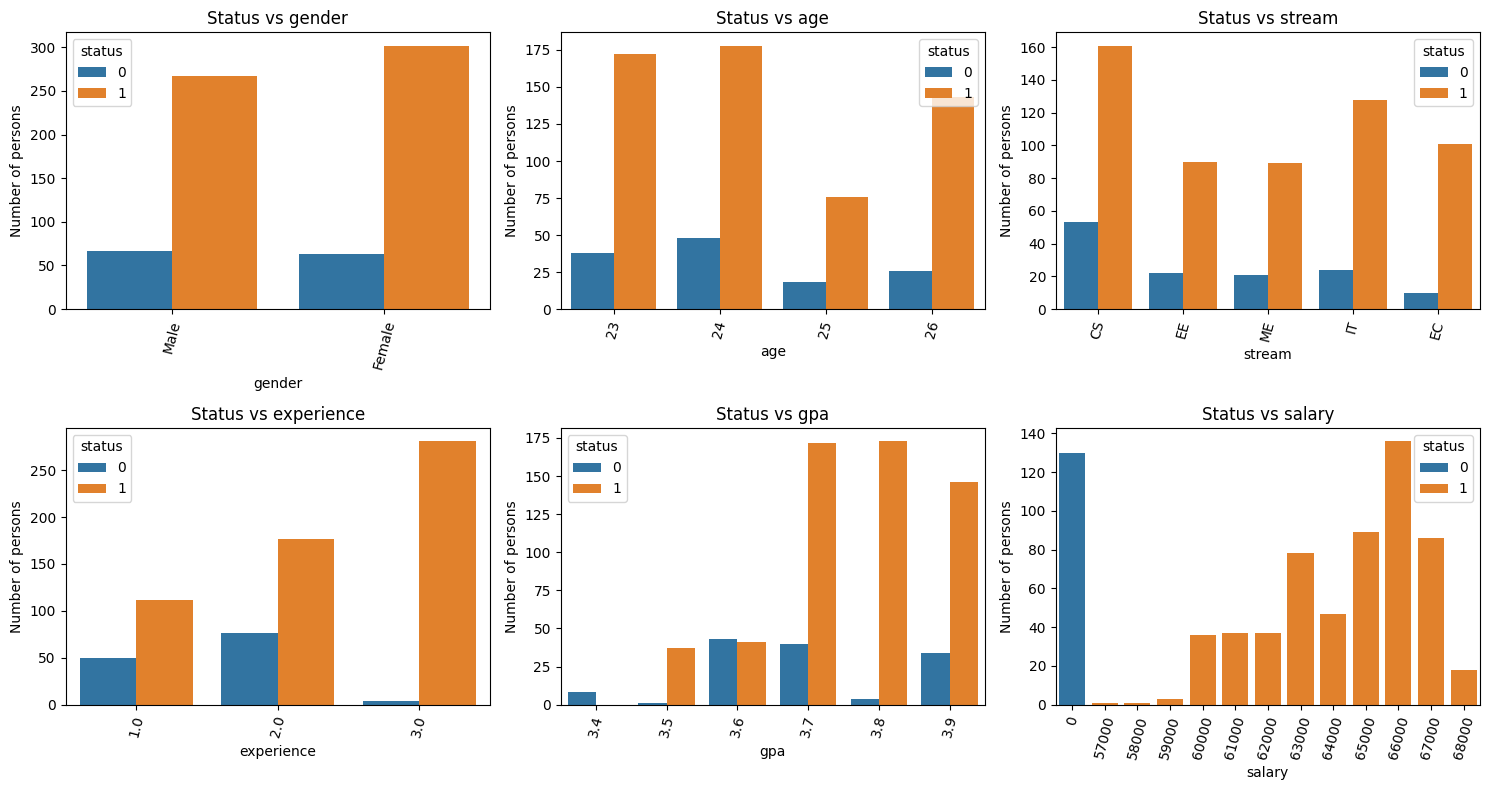

In [32]:

def graph1(col, ax):
    sns.countplot(data=data, x=col, hue='status', ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel('Number of persons')
    ax.set_title(f'Status vs {col}')
    ax.tick_params(axis='x', rotation=75)

columns = ['gender', 'age', 'stream', 'experience', 'gpa', 'salary']

# Create subplots (adjust rows & cols based on number of plots)
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten() 


# Loop through columns and plot
for i, col in enumerate(columns):
    graph1(col, axes[i])

plt.tight_layout()
plt.savefig("status.png", dpi=300)
plt.show()


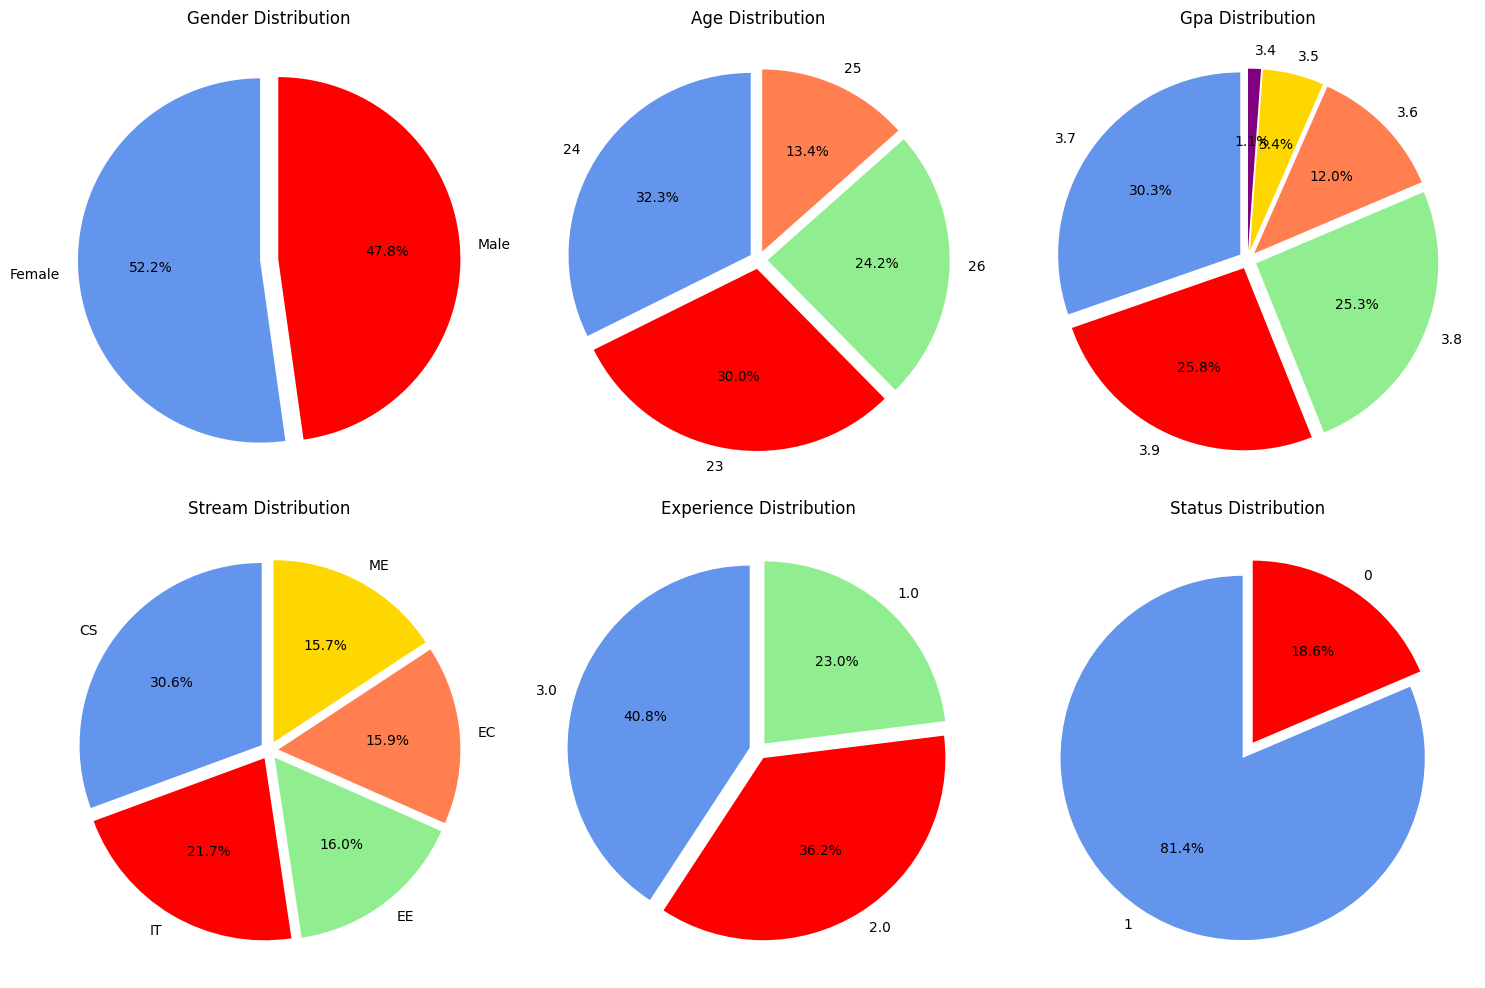

In [115]:
# columns
column_variable = ['gender', 'age', 'gpa', 'stream', 'experience', 'status']

# colors
colors = ['cornflowerblue', 'red', 'lightgreen', 'coral', 'gold', 'purple']

fig, axes = plt.subplots(2, 3, figsize=(15,10))

# Flatten the axes array for easy iteration
axes = axes.flatten()


for i, col in enumerate(column_variable):
    counts = data[col].value_counts()
    chart_colors = colors[:len(counts)]
    
    # Create pie chart
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', 
                startangle=90, colors=chart_colors, explode=[0.05] * len(counts))
    
    axes[i].set_title(f'{col.capitalize()} Distribution')

plt.tight_layout()
plt.show()


### Exporting dataset for further use


In [33]:
data.to_csv("cleaned_data.csv", index=False)

### A detailed project report (in progress ..)

### Key Takeaways
1. Experience plays crucial role
2. GPA & Experience lead to better salary package
3. Females tend to have higher placement percentage by a slight margin

### Future Scope (continuation)
1. Automate reporting and dashboard
2. Conduct Predictive Modelling for placements
3. Optimize data storage

### Add ons
1. Enhanced dataset with more features
2. Career recommendation system based on profiles